In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### test1

Found 632 files belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


10/10 [==============================] - 262s 24s/step - loss: 0.1035 - accuracy: 0.9699
Loss:  0.10348380357027054
Accuracy:  0.969936728477478
Execution time: 281.8125624656677 seconds
20/20 [==============================] - 245s 12s/step


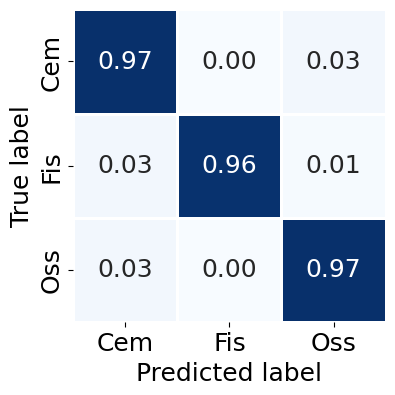

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import seaborn as sns
from datetime import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import sklearn
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker




# import the time module
import time

# get the current time in seconds since the epoch
st = time.time()



TYPE = "Gray_image_InceptionResNetV2"
PATH = os.path.join('/content/drive/MyDrive/Senior Project/Senior V 4 Grayscale/Gray/')
output_dir = '/content/drive/MyDrive/Senior Project/Senior V 4 Grayscale/Gray/Output_InceptionResNetV2/'+TYPE

test_dir = os.path.join(PATH, 'split_test_cell/')
# output_dir = './Output/New_image/'+TYPE
# test_dir = os.path.join(PATH, 'test')
test_cem_dir = os.path.join(test_dir, 'ce')
test_fib_dir = os.path.join(test_dir, 'fi')
test_oss_dir = os.path.join(test_dir, 'os')


BATCH_SIZE =64
IMG_HEIGHT = 256
IMG_WIDTH = 256
NUM_CLASS = 3

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

AUTOTUNE = tf.data.AUTOTUNE
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Load the model
model_gray_inception = load_model('/content/drive/MyDrive/Senior Project/Senior V 4 Grayscale/Gray/Output_InceptionResnetV2/Gray_image_InceptionResNetV2/InceptionResNetV2_Gray_best.h5')
model_gray_inception.compile(
optimizer='adam',
loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

#evaluate the model
score = model_gray_inception.evaluate(test_ds)
#print the results
print("Loss: ", score[0])
print("Accuracy: ", score[1])




# get the end time
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')




#confution matrix
x_test = np.array([])
y_test = np.array([])
for images, labels in test_ds:
    # Reshape images to a 4D array with shape (batch_size, height, width, channels)
    images_4d = images.numpy().reshape(-1, IMG_HEIGHT, IMG_WIDTH, 3)
    # Extend x with the reshaped images
    if x_test.size == 0:
        x_test = images_4d
    else:
        x_test = np.concatenate([x_test, images_4d])
    y_test = np.concatenate([y_test, labels.numpy()])

classes=['Cem','Fis','Oss']
y_pred = model_gray_inception.predict(x_test)
y_pred = tf.argmax(y_pred, axis=1)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

mpl.rcParams['font.size'] = 18
figure = plt.figure(figsize=(4, 4))
# sns.heatmap(con_mat_df, annot=True, fmt='d', cmap='Blues', cbar=False,
#             linewidths=1, linecolor='white', square=True,
#             xticklabels=classes, yticklabels=classes)
sns.heatmap(con_mat_df, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            linewidths=1, linecolor='white', square=True,
            xticklabels=classes, yticklabels=classes)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# figure.savefig(output_dir+'/cell_confusion_matrix.jpg')
figure.savefig('/content/drive/MyDrive/Senior Project/Senior V 4 Grayscale/Gray/Output_InceptionResnetV2/'+TYPE+'/cell_confusion_matrix_inception3.jpg')




20/20 [==============================] - 242s 12s/step


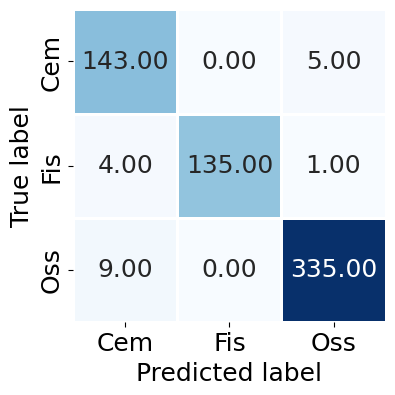

In [7]:
classes=['Cem','Fis','Oss']
y_pred = model_gray_inception.predict(x_test)
y_pred = tf.argmax(y_pred, axis=1)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

mpl.rcParams['font.size'] = 18
figure = plt.figure(figsize=(4, 4))
# sns.heatmap(con_mat_df, annot=True, fmt='d', cmap='Blues', cbar=False,
#             linewidths=1, linecolor='white', square=True,
#             xticklabels=classes, yticklabels=classes)
sns.heatmap(con_mat, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            linewidths=1, linecolor='white', square=True,
            xticklabels=classes, yticklabels=classes)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# figure.savefig(output_dir+'/cell_confusion_matrix.jpg')
figure.savefig('/content/drive/MyDrive/Senior Project/Senior V 4 Grayscale/Gray/Output_InceptionResnetV2/'+TYPE+'/cell_split_confusion_matrix_inception5.jpg')

In [ ]:
#predictions = model.predict(x_test)
#predictions

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred, target_names=classes))
print(confusion_matrix(y_test, y_pred))
#score = model_gray_inception.evaluate(test_ds)
#print the results
#print("Loss: ", score[0])
#print("Accuracy: ", score[1])

              precision    recall  f1-score   support

         Cem       0.92      0.97      0.94       148
         Fis       1.00      0.96      0.98       140
         Oss       0.98      0.97      0.98       344

    accuracy                           0.97       632
   macro avg       0.97      0.97      0.97       632
weighted avg       0.97      0.97      0.97       632

[[143   0   5]
 [  4 135   1]
 [  9   0 335]]


In [ ]:
score = model_gray_inception.evaluate(test_ds)
#print the results
print("Loss: ", score[0])
print("Accuracy: ", score[1])


6/6 [==============================] - 5s 798ms/step - loss: 0.5545 - accuracy: 0.8444
Loss:  0.5544869303703308
Accuracy:  0.8444444537162781
